In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
sales = pd.read_csv('shampoo_sales.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

FileNotFoundError: ignored

In [ ]:
sales.head()

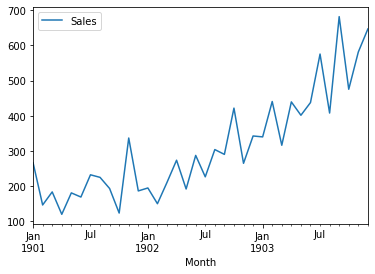

In [ ]:
sales.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


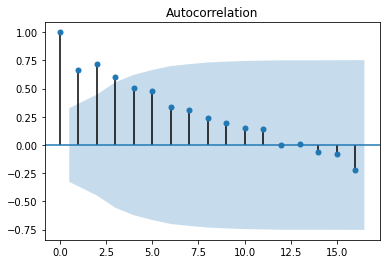

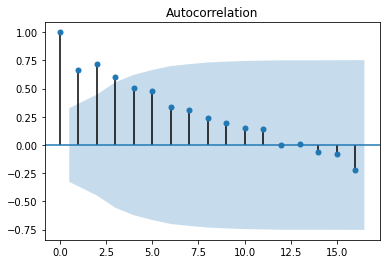

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [ ]:
sales.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [ ]:
sales.shift(1)

,Sales
Month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [ ]:
sales_diff = sales.diff(periods=1)

In [ ]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


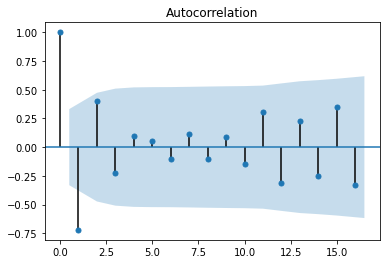

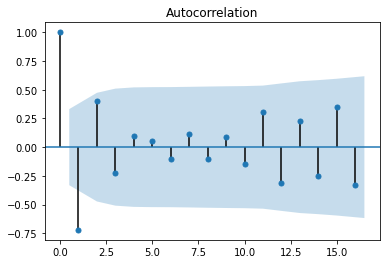

In [ ]:
plot_acf(sales_diff)

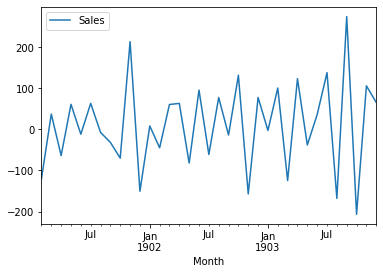

In [ ]:
sales_diff.plot()

In [ ]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []
print(train)

[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]
 [168.5]
 [231.8]
 [224.5]
 [192.8]
 [122.9]
 [336.5]
 [185.9]
 [194.3]
 [149.5]
 [210.1]
 [273.3]
 [191.4]
 [287. ]
 [226. ]
 [303.6]
 [289.9]
 [421.6]
 [264.5]
 [342.3]
 [339.7]
 [440.4]
 [315.9]]


In [ ]:
train.size

27

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=26,end=36)

In [ ]:
test

array([[315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

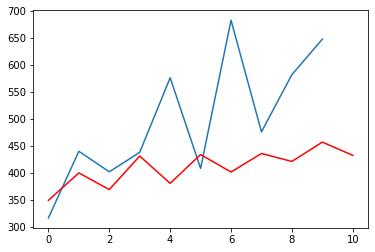

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

296.93717837608705


In [ ]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.90502183, 356.40105883, 414.09392563, 375.46515604,
       448.39588217, 380.08811564, 408.08785593, 413.38340755,
       478.31516943, 417.86145885])

In [ ]:
mean_squared_error(test,predictions)

17627.20737385213

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.4408652263758
(0, 0, 1) 318.7225645688245
(0, 0, 2) 315.224268153613
(0, 0, 3) 316.28154426185563
(0, 0, 4) 310.0787920160301
(0, 1, 0) 311.8422785270635
(0, 1, 1) 296.06152123519945
(0, 1, 2) 296.2367333739943
(0, 2, 0) 329.20614304728224
(0, 2, 1) 306.11426226905087
(1, 0, 0) 316.16959994471813
(1, 0, 1) 313.03169106330046
(1, 0, 2) 310.90095943973597
(1, 0, 4) 309.5762200503576
(1, 1, 0) 298.76616250235514
(1, 1, 1) 297.0826405527671
(1, 1, 2) 299.3945469366944
(1, 1, 3) 299.4987171364578
(1, 1, 4) 299.91610594233316
(1, 2, 0) 306.4628950271215
(1, 2, 3) 290.2072381836082
(2, 0, 0) 310.94768919224816
(2, 0, 1) 339.25491751885653
(2, 1, 0) 300.1487818809822
(2, 1, 1) 297.9466985979365
(2, 1, 2) 298.48301284013604
(2, 1, 3) 302.7812310380532
(2, 2, 0) 306.24877106354876
(3, 0, 0) 312.93535401867996
(3, 0, 1) 338.4610164504261
(3, 1, 0) 294.74021755593594
(3, 1, 1) 295.870586226733
(3, 1, 2) 292.51901268959585
(3, 1, 3) 294.50819163753584
(3, 2, 0) 299.3335490300433
(4, 0